# **Multiple Linear Regression**

In [38]:
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = []

for _ in range(500):
    team_name = f"Team {chr(random.randint(65,90))}"
    season = random.randint(2010, 2023)
    wins = random.randint(50, 110)
    losses = 162 - wins
    hits = random.randint(1200,1600)
    doubles = random.randint(200,350)
    triples = random.randint(10,40)
    home_runs = random.randint(100,250)
    strikeouts = random.randint(1000,1500)

    hits_adjusted = hits + (wins-80) * 5
    doubles_adjusted = doubles + (wins-80) * 2
    triples_adjusted = triples + (wins-80) * 3
    home_runs_adjusted = home_runs + (wins-80) * 3
    strikeouts_adjusted = strikeouts - (wins - 80) * 10

    data.append([team_name, season, wins, losses, hits_adjusted, doubles_adjusted, triples_adjusted, home_runs_adjusted, strikeouts_adjusted])

In [30]:
columns = ["Team", 'Season', 'Wins',"Losses", 'Hits', 'Doubles', "Tripples", 'HomeRuns', 'Strikesouts']

df = pd.DataFrame(data, columns=columns)
df




,Team,Season,Wins,Losses,Hits,Doubles,Tripples,HomeRuns,Strikesouts
0,Team X,2021,55,107,1357,299,-60,41,1303
1,Team Y,2013,105,57,1635,368,107,224,865
2,Team P,2018,81,81,1386,268,16,241,1121
3,Team F,2020,102,60,1360,370,103,228,1135
4,Team K,2021,64,98,1194,277,-9,136,1513
...,...,...,...,...,...,...,...,...,...
495,Team J,2023,82,80,1243,290,38,242,1466
496,Team X,2022,71,91,1332,195,-3,163,1316
497,Team W,2014,92,70,1597,294,47,217,912
498,Team C,2021,54,108,1239,283,-53,166,1648


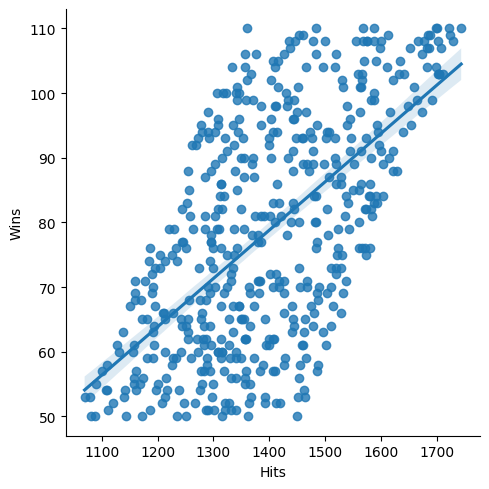

In [31]:
sns.lmplot(x="Hits", y="Wins", data=df)

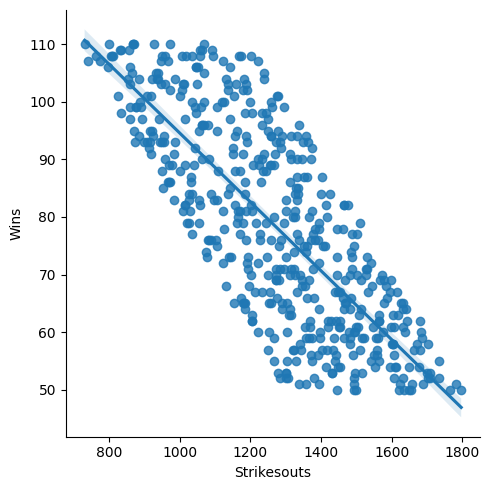

In [32]:
sns.lmplot(x="Strikesouts", y="Wins", data=df)

In [33]:
df2 = df.drop(columns=['Team', 'Season', 'Losses'], axis=1)
df2

,Wins,Hits,Doubles,Tripples,HomeRuns,Strikesouts
0,55,1357,299,-60,41,1303
1,105,1635,368,107,224,865
2,81,1386,268,16,241,1121
3,102,1360,370,103,228,1135
4,64,1194,277,-9,136,1513
...,...,...,...,...,...,...
495,82,1243,290,38,242,1466
496,71,1332,195,-3,163,1316
497,92,1597,294,47,217,912
498,54,1239,283,-53,166,1648


In [34]:
df2.columns

Index(['Wins', 'Hits', 'Doubles', 'Tripples', 'HomeRuns', 'Strikesouts'], dtype='object')

In [35]:
X = df[['Hits', 'Doubles', 'Tripples', 'HomeRuns', 'Strikesouts']]
y = df['Wins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
lr.score(X_test, y_test)

0.9735839579415312

In [37]:
lr.score(X_train, y_train)

0.9773709083567677

In [39]:
y_pred = lr.predict(X_test)
y_pred

array([ 94.64235113,  64.09907732,  74.27242293,  77.63737347,
       105.5153325 , 106.19586898,  56.2669575 ,  80.46076616,
        82.52684597, 103.72814866,  96.86359449, 110.62611936,
        93.0737256 ,  49.76979943,  53.72366884,  94.78166729,
        55.88610879,  50.13043332, 109.68094441,  57.7694621 ,
        78.90281285,  98.18778497,  47.73373016, 100.37692224,
        55.04791227, 106.13625985,  53.81219612,  66.04683779,
        82.58770067,  96.53831535,  64.62428781,  98.2507731 ,
       110.49999348,  81.92215378,  59.36691517,  75.5197556 ,
        69.51890066,  96.59566575,  54.5264769 ,  71.07483931,
       106.2438434 ,  79.80204124,  92.1305092 ,  57.13776594,
        60.12981248,  58.0271148 ,  64.3487851 ,  73.25218764,
        96.52637052,  77.87610193,  62.45705254,  51.55173884,
       103.23554327,  88.23199963,  57.0451386 ,  94.68998863,
        76.16119912,  67.19870714,  63.58835094,  83.65362273,
        88.9681909 ,  60.68117036,  69.92785881,  85.88

In [40]:
mean_absolute_error(y_test, y_pred)

2.5040067531146923

In [41]:
mean_squared_error(y_test, y_pred)

8.829762819962857

In [42]:
r2_score(y_test, y_pred)

0.9735839579415312

In [43]:
lr.coef_

array([ 0.00411776,  0.00262767,  0.28697775,  0.01206071, -0.00407327])

In [44]:
lr.intercept_

69.47036184602997